<a href="https://colab.research.google.com/github/SaiVandana-11/Projects/blob/main/Energy_Consumption_Multivariate_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.metrics import (
    mean_squared_error, r2_score
)

In [ ]:
# load the csv and printing the first rows

from google.colab import files
uploaded = files.upload()

Saving Energy_Consumption_Multivariate_Dataset.csv to Energy_Consumption_Multivariate_Dataset.csv


In [ ]:
df = pd.read_csv('Energy_Consumption_Multivariate_Dataset.csv')

print(df.head(20))

    Building Size (m2)  Number of Occupants Heating Type   Usage Type  \
0           221.825902                    5     electric   commercial   
1            54.118269                   11          gas  residential   
2            60.387119                    8          gas   commercial   
3            19.527353                    3     electric   commercial   
4           164.905572                    1     electric   commercial   
5           -72.615402                    3          oil   commercial   
6           230.860882                    1     electric  residential   
7            42.909482                    6          gas  residential   
8           123.927932                   10          gas  residential   
9            81.297222                   11     electric  residential   
10          209.658095                    5          oil   commercial   
11          -54.510553                    2     electric   commercial   
12           75.818710                    5     ele

In [ ]:
# check for missing values
print(df.isnull().sum())

# general info
print(df.info())

# summary statistics
print(df.describe())

# analyzing the categorical features
print()
print(df['Heating Type'].value_counts())
print()
print(df['Usage Type'].value_counts())

Building Size (m2)     0
Number of Occupants    0
Heating Type           0
Usage Type             0
Energy Consumption     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Size (m2)   500 non-null    float64
 1   Number of Occupants  500 non-null    int64  
 2   Heating Type         500 non-null    object 
 3   Usage Type           500 non-null    object 
 4   Energy Consumption   500 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.7+ KB
None
       Building Size (m2)  Number of Occupants  Energy Consumption
count          500.000000            500.00000          500.000000
mean           104.007767              6.18000          120.356031
std             74.204861              3.15015           52.215040
min           -109.481375              1.00000          -15.138271
25%  

There is no missing values and the dataset contains 500 observations. There are negative values for the building size and the energy consumption which is not possible so we need to consider the absolute values.

In [ ]:
# Taking a count of negative values

count_buildsize = (df['Building Size (m2)'] <= 0).sum()
count_energy = (df['Energy Consumption'] <= 0).sum()
print(f'Number of invalid building sizes: {count_buildsize}')
print(f'Number of invalid energy consumptions: {count_buildsize}')

Number of invalid building sizes: 39
Number of invalid energy consumptions: 39


In [ ]:
# Converting all the negative values into positive values

df['Building Size (m2)'] = df['Building Size (m2)'].abs()
df['Energy Consumption'] = df['Energy Consumption'].abs()

In [ ]:
# Converting categorical variables into numerical by one hot encoding

df = pd.get_dummies(df, columns = ['Heating Type', 'Usage Type'], drop_first = True)

In [ ]:
# Defining the variables

X = df.drop(columns = 'Energy Consumption')       # to ensure all columns other than the Energy Consumption column are considered

Y = df['Energy Consumption']

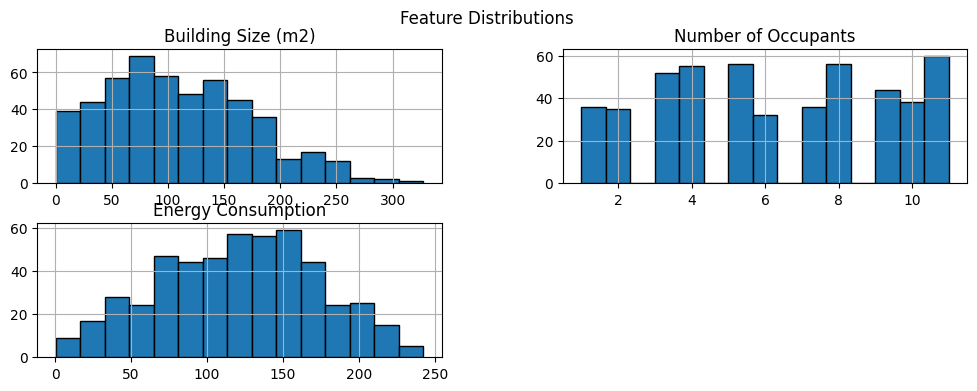

In [ ]:
# Plotting feature distributions

df.hist(figsize = (12, 4), bins = 15, edgecolor = 'black')
plt.suptitle("Feature Distributions")
plt.show()

The feature distributions building size and energy consumption seem to be close to normal.

In [ ]:
# Split data into training and test sets

X_train, X_mid, Y_train, Y_mid = train_test_split(X, Y, test_size = 0.4, random_state = 2106)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_mid, Y_mid, test_size = 0.5, random_state = 2106)

# Testing shape of the split data

print(f'Shape of Train: {X_train.shape[0]}')
print(f'Shape of Valid: {X_valid.shape[0]}')
print(f'Shape of Test: {X_test.shape[0]}')

Shape of Train: 300
Shape of Valid: 100
Shape of Test: 100


In [ ]:
# Testing Linear Regression on the data

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Determining the intercept and coefficient for degree 1

print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_}')

Intercept: -3.9525997975239164
Coefficient: [ 0.31961014  2.20363    46.1016776  89.84485821 55.25247874]


In [ ]:
# Prediction for degree 1 features

Y_pred = model.predict(X_train)

In [ ]:
# Metrics for degree 1 linear regression

mse_train = mean_squared_error(Y_train, Y_pred)
r2_train = r2_score(Y_train, Y_pred)
print(f'MSE: {mse_train:.2f}')
print(f'R-squared: {r2_train:.2f}')

MSE: 75.54
R-squared: 0.97


In [ ]:
# Testing high degree polynomial features up to power 7

degree = np.arange(1, 8)
for d in degree:
    poly = PolynomialFeatures(degree = d, include_bias = True)
    X_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model.fit(X_poly, Y_train)

    # Check for valid degrees
    print(f'Degree: {d}')

    # Predict relationship using the different degrees of features and check metrics
    Y_poly_pred = model.predict(X_poly)
    mse_poly_train = mean_squared_error(Y_train, Y_poly_pred)
    r2_poly_train = r2_score(Y_train, Y_poly_pred)
    print(f'MSE: {mse_poly_train:.2f}')
    print(f'R-squared: {r2_poly_train:.2f}')

    X_poly_sm = sm.add_constant(X_poly)
    ols_poly_model = sm.OLS(Y_train, X_poly_sm).fit()

    print(f'Polynomial Model BIC: {ols_poly_model.bic}, AIC: {ols_poly_model.aic}')
    print()

Degree: 1
MSE: 75.54
R-squared: 0.97
Polynomial Model BIC: 2182.9925097330847, AIC: 2160.7698148851473

Degree: 2
MSE: 74.09
R-squared: 0.97
Polynomial Model BIC: 2239.902229008251, AIC: 2176.9379269390956

Degree: 3
MSE: 71.26
R-squared: 0.98
Polynomial Model BIC: 2325.1981931977257, AIC: 2199.269589059415

Degree: 4
MSE: 67.46
R-squared: 0.98
Polynomial Model BIC: 2439.943026860198, AIC: 2228.8274258047945

Degree: 5
MSE: 64.59
R-squared: 0.98
Polynomial Model BIC: 2586.5537433507247, AIC: 2271.732233004948

Degree: 6
MSE: 130.34
R-squared: 0.95
Polynomial Model BIC: 2617.1618394167194, AIC: 2280.117634223005

Degree: 7
MSE: 283.70
R-squared: 0.90
Polynomial Model BIC: 2911.0729719893957, AIC: 2574.0287667956813



Considering that the mean squared error is comparable between degree 4 and 5, and the R-squared is 0.98 with comparable AIC and BIC scores, we can take the simpler model (degree 4, with lower AIC and BIC) to be the relevant degree to move ahead with.

In [ ]:
# Finding out the intercept and coefficients for the degree 4 polynomial model

poly_final = PolynomialFeatures(degree = 4, include_bias = True)
X_poly_final = poly_final.fit_transform(X_train)
X_test_poly_final = poly_final.transform(X_test)
model.fit(X_poly_final, Y_train)
Y_poly_final_pred = model.predict(X_poly_final)
coefs = pd.DataFrame({
    'Feature': poly_final.get_feature_names_out(),
    'Coefficient': model.coef_
})
important_coeffs = coefs[coefs['Coefficient'].abs() > 4]        # Narrow down the most relavent coefficients - ones with highest impact
print(f'Intercept: {model.intercept_}')
print(important_coeffs)

Intercept: 21.959938420630692
                      Feature  Coefficient
2         Number of Occupants   -12.378780
3            Heating Type_gas     4.470706
4            Heating Type_oil    17.468293
5      Usage Type_residential    14.349981
15         Heating Type_gas^2     4.470705
18         Heating Type_oil^2    17.468293
20   Usage Type_residential^2    14.349981
46         Heating Type_gas^3     4.470705
52         Heating Type_oil^3    17.468293
55   Usage Type_residential^3    14.349981
111        Heating Type_gas^4     4.470705
121        Heating Type_oil^4    17.468293
125  Usage Type_residential^4    14.349981


Hence looking at these important coefficients we can determine which features at which degrees impact the energy consumption the most and which features we want to work with to control this target variable in different situations. From the narrowing down we have done in this situation, we see that:

*   the heating type oil contributes to the most of energy consumption while the heating type gas is the second most (for heating types specifically).
*   here we also see that residential usage of energy contributes to a large amount of consumption while commercial does not comparatively.
*   another point to note is that the number of occupants feature seems to be inversely proportional to the enery consumption.

These observations can be used by analysts and business teams to make social changes for the better.